#### Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#### Data loading, dropping production

In [2]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv')

In [3]:
features = data.loc[:, ['Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]
features.describe()

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.885714,9.823810,68.880952,15.285714,10.190476,292.714286,16.579524
std,0.708721,5.948521,45.167894,2.759400,6.439092,59.429069,6.543793
min,1.000000,0.100000,0.500000,10.000000,1.000000,210.000000,3.540000
25%,1.100000,4.900000,24.600000,14.000000,6.000000,245.000000,11.520000
50%,2.000000,10.000000,72.900000,16.000000,10.000000,273.000000,16.900000
75%,2.200000,15.100000,100.000000,17.000000,13.000000,340.000000,21.970000
max,2.900000,19.100000,160.000000,20.000000,21.000000,395.000000,29.250000


#### Sequential Backward Feature Selection with Linear regression

In [4]:
X=features.values

In [5]:
y=np.squeeze(data.loc[:, ['Production']].values)

In [6]:
loo = LeaveOneOut()

In [7]:
LR = LinearRegression()

sfs = SFS(estimator=LR, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv = loo,
          n_jobs = -1)

sfs = sfs.fit(X, y)

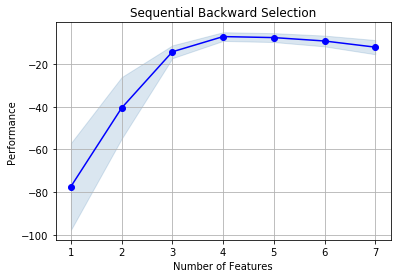

In [8]:
fig= plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection')
plt.grid();

In [9]:
# save results to dataframe
selected_summary = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
selected_summary['index'] = selected_summary.index
selected_summary.sort_values(by='avg_score', ascending=0)

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err,index
4,-7.21576,4.22087,"[-16.29949342891783, -0.27293368410213237, -5....","(0, 1, 2, 3)","(0, 1, 2, 3)",9.07683,2.02964,4
5,-7.68695,4.32124,"[-17.240275443538813, -0.914829402814391, -7.3...","(0, 1, 2, 3, 4)","(0, 1, 2, 3, 4)",9.29267,2.0779,5
6,-9.27588,5.23563,"[-30.68734559577946, -0.382576309729883, -8.33...","(0, 1, 2, 3, 4, 6)","(0, 1, 2, 3, 4, 6)",11.259,2.5176,6
7,-12.1561,6.90979,"[-41.54727896993002, -0.01765014967685895, -5....","(0, 1, 2, 3, 4, 5, 6)","(0, 1, 2, 3, 4, 5, 6)",14.8593,3.32263,7
3,-14.3201,6.22978,"[-15.80179265395075, -3.214416151317504, -0.95...","(0, 1, 3)","(0, 1, 3)",13.3969,2.99564,3
2,-40.576,29.923,"[-25.976143595660844, -0.14395649922134976, -1...","(0, 1)","(0, 1)",64.3484,14.3887,2
1,-77.2993,42.2025,"[-10.808128130366436, -67.99831861802683, -55....","(1,)","(1,)",90.7549,20.2934,1


In [10]:
# feature selection with highest score
feature_idx = np.array(selected_summary.loc[4]['feature_idx'])
feature_idx

array([0, 1, 2, 3])

In [11]:
selected = features.iloc[:,feature_idx]
print(list(selected))

['Position', 'Gross pay', 'Phi-h', 'Pressure']


In [12]:
selected

,Position,Gross pay,Phi-h,Pressure
0,2.1,0.1,0.5,19
1,1.1,1.0,4.0,16
2,1.0,1.9,19.0,14
3,2.1,3.1,21.7,17
4,2.9,4.1,24.6,11
5,1.1,4.9,39.2,12
6,2.1,5.9,23.6,13
7,2.0,7.0,63.0,13
8,2.9,8.1,72.9,14
9,2.8,8.9,35.6,16


#### Sequential Backward Feature Selection with Kernel Ridge Regression
https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

Use Grid Search to tune hyperparameters